
# **Adaline (Adaptive Linear Neuron) for Binary Classification (simple) on NumPy**

# Adaline class on NumPy

In [98]:
import numpy as np

In [99]:
class Adaline:
  def __init__(self, learning_rate=0.01, epochs=50):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = np.random.normal(loc=0.0, scale=0.02, size=1+np.shape(X)[1])
    self.errors = []

  def fit(self, X, y):
    for iteration in range(self.epochs):
      weighted_sum = self.weighted_sum(X)
      output = self.activation(weighted_sum)
      error = y - output

      self.weights[0] += self.learning_rate * error.sum()
      self.weights[1:] += self.learning_rate * X.T.dot(error)

      self.errors.append((error**2).sum()/2.0)
    return self

  def weighted_sum(self, X):
    return np.dot(X, self.weights[1:]) + self.weights[0]

  def activation(self, w_s):
    return w_s

  def predict(self, X):
    return np.where(self.activation(self.weighted_sum(X)) >= 0, 1, -1)


# Import Data

In [100]:
import pandas as pd

In [101]:
path_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(path_url, header=None, encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Make Pipelines

In [103]:
df1 = df[(df.iloc[:,4]=='Iris-setosa') | (df.iloc[:,4]=='Iris-versicolor')]
X = df1.iloc[:, [0,1,2,3]].values
X_test = np.concatenate((X[:10], X[-10:]))
X = X[10:-10]

In [104]:
y = df1.iloc[:, 4].values
y = np.where(y=='Iris-setosa', 1, -1)
y_test = np.concatenate((y[:10], y[-10:]))
y = y[10:-10]

## Normalize

In [105]:
def normalize(X):
  return (X - X.mean())/X.std()

In [106]:
X[:5]

array([[5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2]])

In [107]:
X = normalize(X)
X_test = normalize(X_test)

In [108]:
X[:5]

array([[ 1.22265859,  0.32565755, -0.83516733, -1.52110931],
       [ 0.90606999,  0.16736325, -0.78240257, -1.52110931],
       [ 0.90606999, -0.04369582, -0.8879321 , -1.57387408],
       [ 0.64224615, -0.04369582, -1.0462264 , -1.57387408],
       [ 1.43371766,  0.48395185, -0.99346163, -1.52110931]])

In [109]:
print('X shape', np.shape(X))
print('y shape', np.shape(y))
print('X_test shape', np.shape(X_test))
print('y_test shape', np.shape(y_test))

X shape (80, 4)
y shape (80,)
X_test shape (20, 4)
y_test shape (20,)


# Train Model

In [110]:
bc = Adaline(learning_rate=0.001,epochs=10)
bc.fit(X, y)
print('Model created')

Model created


In [111]:
import matplotlib.pyplot as plt

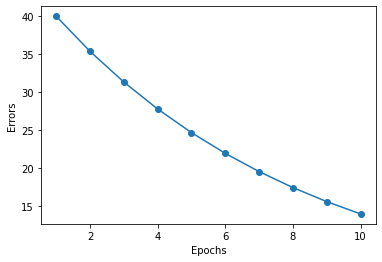

In [112]:
plt.plot(range(1, len(bc.errors) + 1), bc.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

# Test Model

In [113]:
print('Predictions for binary classification perceptron on test samples')
for x, y in zip(X_test, y_test):
  prediction = 'Iris-setosa' if bc.predict(x)==1 else 'Iris-versicolor'
  y_txt = 'Iris-setosa' if y==1 else 'Iris-versicolor'
  print('Features: ', x, ' actual target - ', y_txt, ' Predict - ', prediction)

Predictions for binary classification perceptron on test samples
Features:  [ 1.21391676  0.3173135  -0.85947828 -1.53193073]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [ 1.10184135  0.03712498 -0.85947828 -1.53193073]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [ 0.98976595  0.14920039 -0.91551599 -1.53193073]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [ 0.93372824  0.09316268 -0.80344058 -1.53193073]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [ 1.15787906  0.3733512  -0.85947828 -1.53193073]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [ 1.38202987  0.54146431 -0.69136517 -1.41985532]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [ 0.93372824  0.26127579 -0.85947828 -1.47589303]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [ 1.15787906  0.26127579 -0.80344058 -1.53193073]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [ 0.

# Make Predictions

In [114]:
print('For prediction enter features')
features_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
F = []
for name in features_names:
  f = float(input(name))
  F.append(f)
F = normalize(np.array(F))
prediction = 'Iris-setosa' if bc.predict(F)==1 else 'Iris-versicolor'
print('Features(normalized): ', F, ' Predict - ', prediction)

For prediction enter features
Sepal Length4
Sepal Width2
Petal Length1
Petal Width1
Features(normalized):  [ 1.63299316  0.         -0.81649658 -0.81649658]  Predict -  Iris-setosa
